In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# pv_data = pd.read_csv('pv_proceeded.csv')[55000:70000]
# pv_data = pd.read_csv('pv_proceeded.csv')[70000:85000]
# pv_data = pd.read_csv('pv_proceeded.csv')[55000:85000]
pv_data = pd.read_csv('pv_proceeded.csv')[30000:80000]
pv_data.shape
# [70000:80000]
# [50000:60000]

(50000, 3)

(25000, 2)


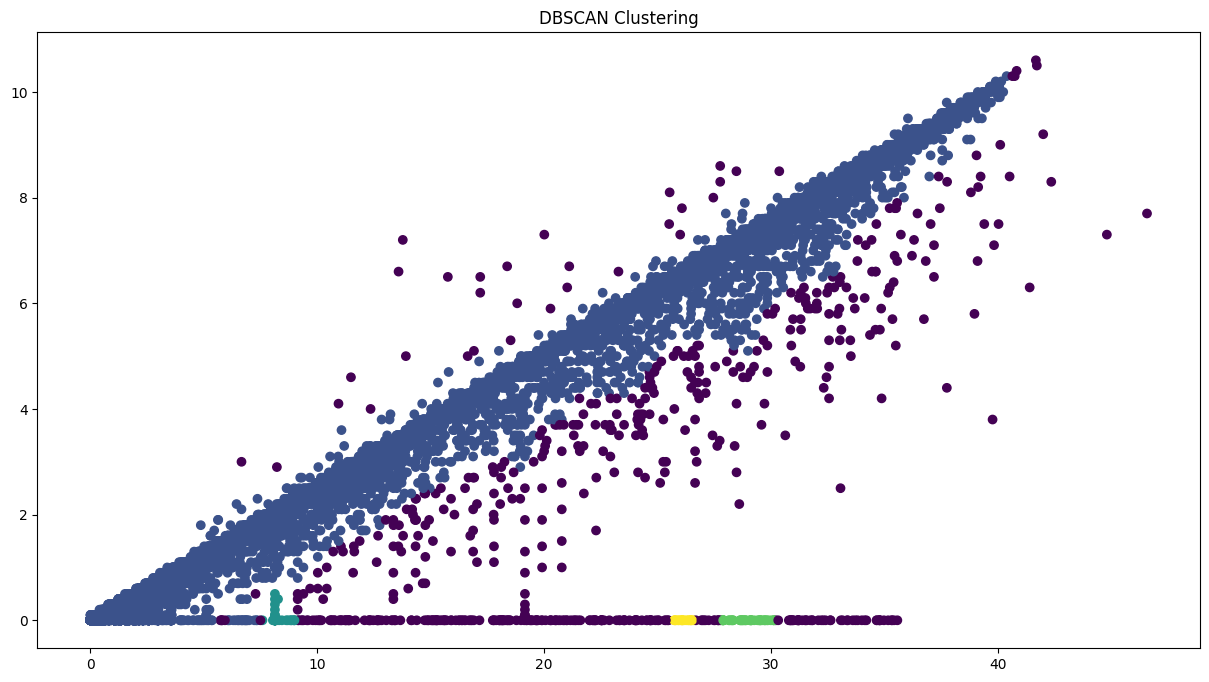

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 创建一个数据集，用于演示
X = pv_data[['power', 'generation']]
print(X.shape)
# 数据标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X.to_numpy()

# DBSCAN模型训练
dbscan = DBSCAN(eps=0.5, min_samples=20)
clusters = dbscan.fit_predict(X_scaled)

# 绘制结果
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title('DBSCAN Clustering')
plt.show()

(50000, 2)


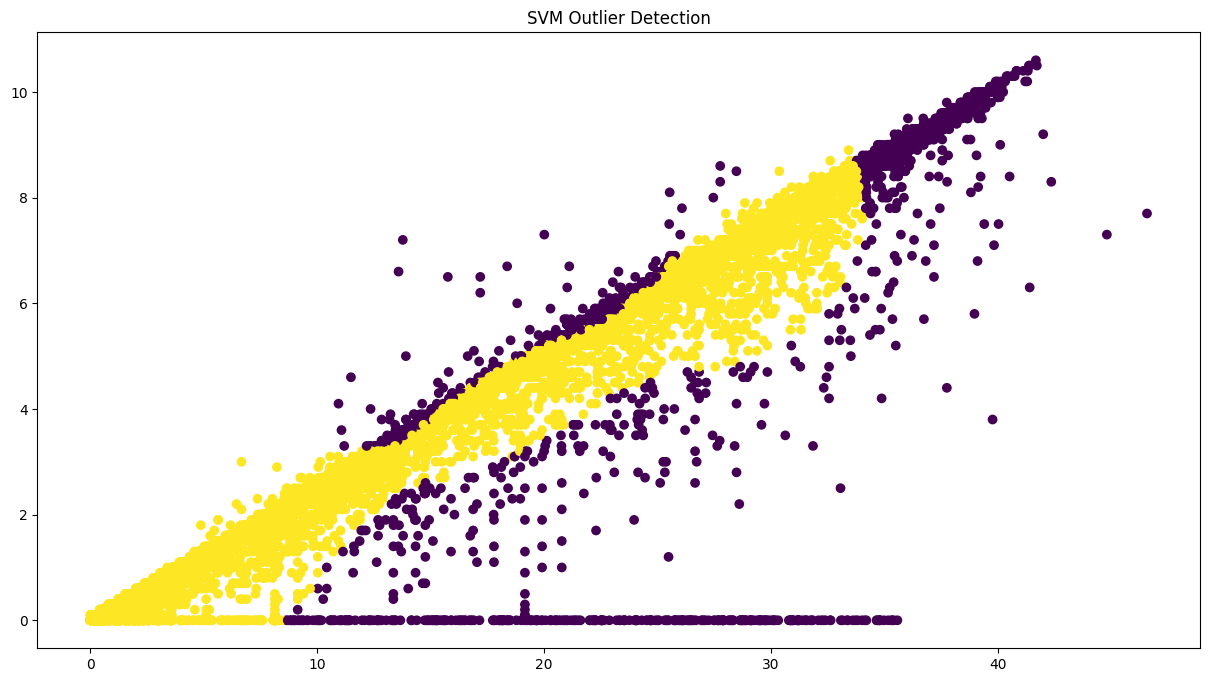

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 创建一个数据集，用于演示
X = pv_data[['power', 'generation']]
print(X.shape)

# 数据标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X.to_numpy()

# SVM模型训练
svm = OneClassSVM(nu=0.1, kernel='rbf')
clusters = svm.fit_predict(X_scaled)

# 绘制结果
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title('SVM Outlier Detection')
plt.show()

(50000, 2)
(50000, 3)
dist的 3σ范围：-1.5239182157721336 ~ 1.756341533802015
(50000, 4)
0    49361
1      639
Name: color, dtype: int64


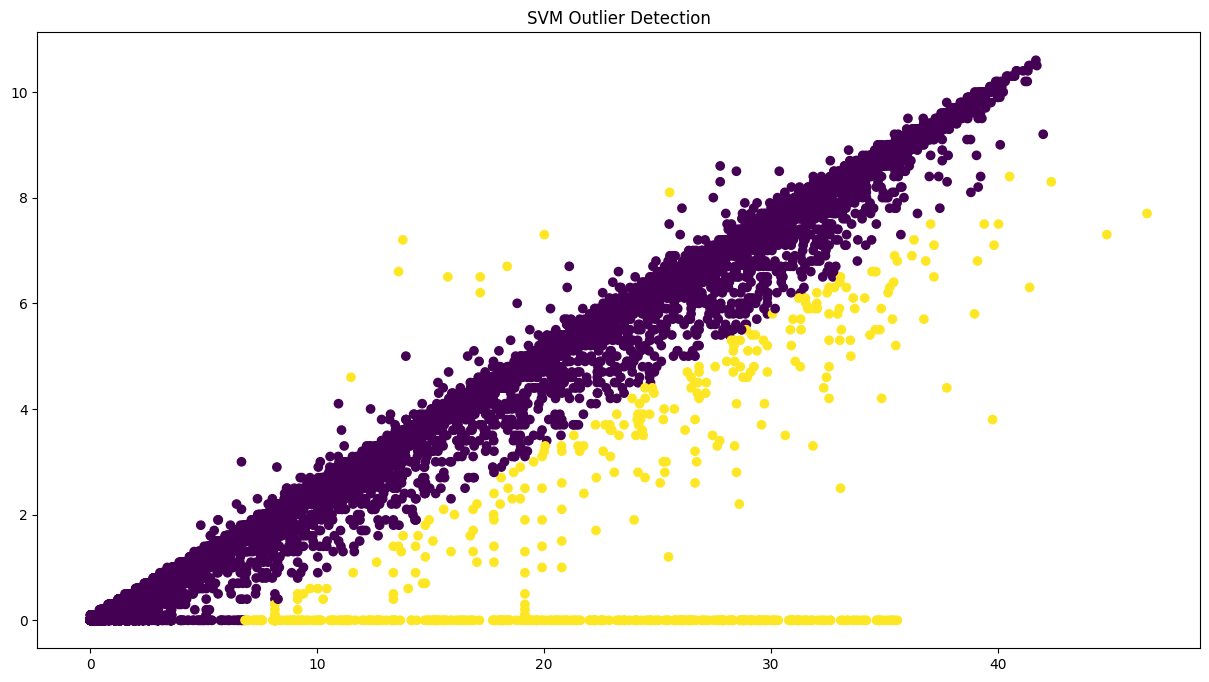

In [100]:
X = pv_data[['power', 'generation']]
print(X.shape)
X['dist'] = np.abs(-1 * X['power'] + 4 * X['generation']) / np.sqrt(4**2 + -1**2)
print(X.shape)
# d = abs(A * x1 + B * y1 + C) / np.sqrt(A**2 + B**2)
# Ax + By + C = 0
# y = 0.25x
# 4x - y = 0
# 假设 df 是你的数据框  
column_name = 'dist'
upper_bound = X['dist'].mean() + X['dist'].std() * 3
lower_bound = X['dist'].mean() - X['dist'].std() * 3
print(f"{column_name}的 3σ范围：{lower_bound} ~ {upper_bound}")  
# X['color'] = 0 if X['dist'] >= lower_bound and X['dist'] <= upper_bound else 1
X['color'] = X['dist'].apply(lambda x: 0 if x >= lower_bound and x <= upper_bound else 1)
print(X.shape)
print(X['color'].value_counts())
X = X.to_numpy()
# 绘制结果
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c=X[:, 3])
plt.title('SVM Outlier Detection')
plt.show()